In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
employee_data = pd.read_csv('Employee.csv')
employee_data.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [3]:
employee_data.isna().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [4]:
employee_data.duplicated().sum()

np.int64(1889)

In [5]:
employee_data.drop_duplicates(inplace=True)

In [6]:
employee_data.sort_values(by='JoiningYear', ascending=False, inplace=True)

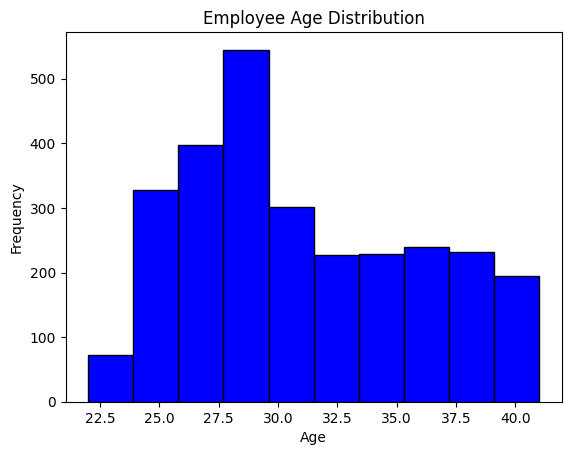

In [7]:
plt.hist(employee_data["Age"], bins=10, color='blue', edgecolor='black')
plt.title('Age Distribution of Employees')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Employee Age Distribution')
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_3656\974909954.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=employee_data, x='City', palette='Set2')


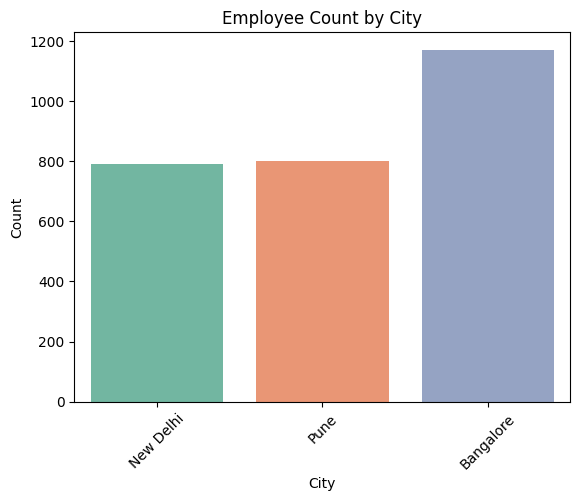

In [8]:
sns.countplot(data=employee_data, x='City', palette='Set2')
plt.title('Employee Count by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

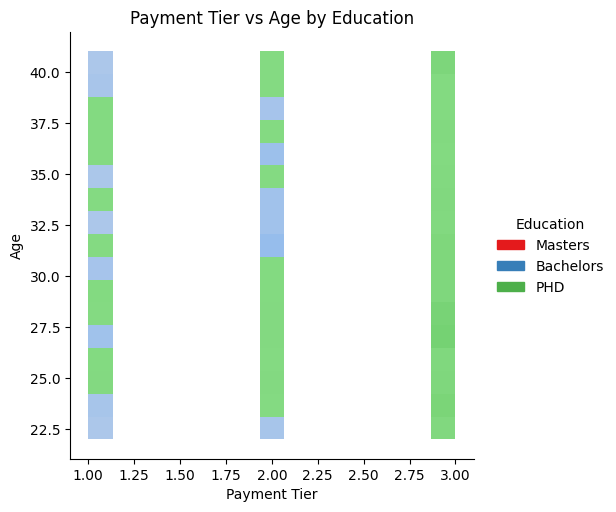

In [9]:
sns.displot(data=employee_data, x='PaymentTier', y='Age', hue='Education', palette='Set1')
plt.title('Payment Tier vs Age by Education')
plt.xlabel('Payment Tier')
plt.ylabel('Age')
plt.show()

In [10]:
employee_data.columns

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')

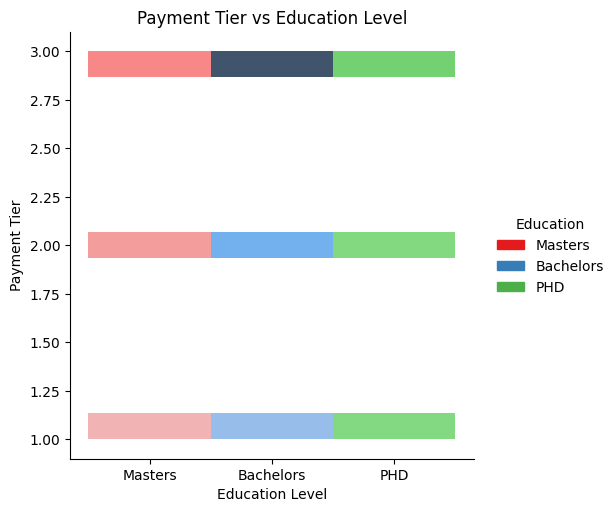

In [11]:
sns.displot(data=employee_data, x='Education', y='PaymentTier', hue='Education', palette='Set1')
plt.title('Payment Tier vs Education Level')
plt.xlabel('Education Level')
plt.ylabel('Payment Tier')
plt.show()

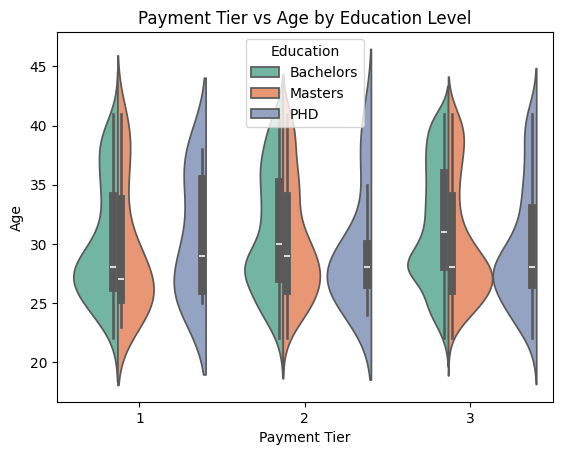

In [12]:
sns.violinplot(data=employee_data, x='PaymentTier', y='Age', hue='Education', split=True, palette='Set2')
plt.title('Payment Tier vs Age by Education Level')
plt.xlabel('Payment Tier')
plt.ylabel('Age')
plt.show()

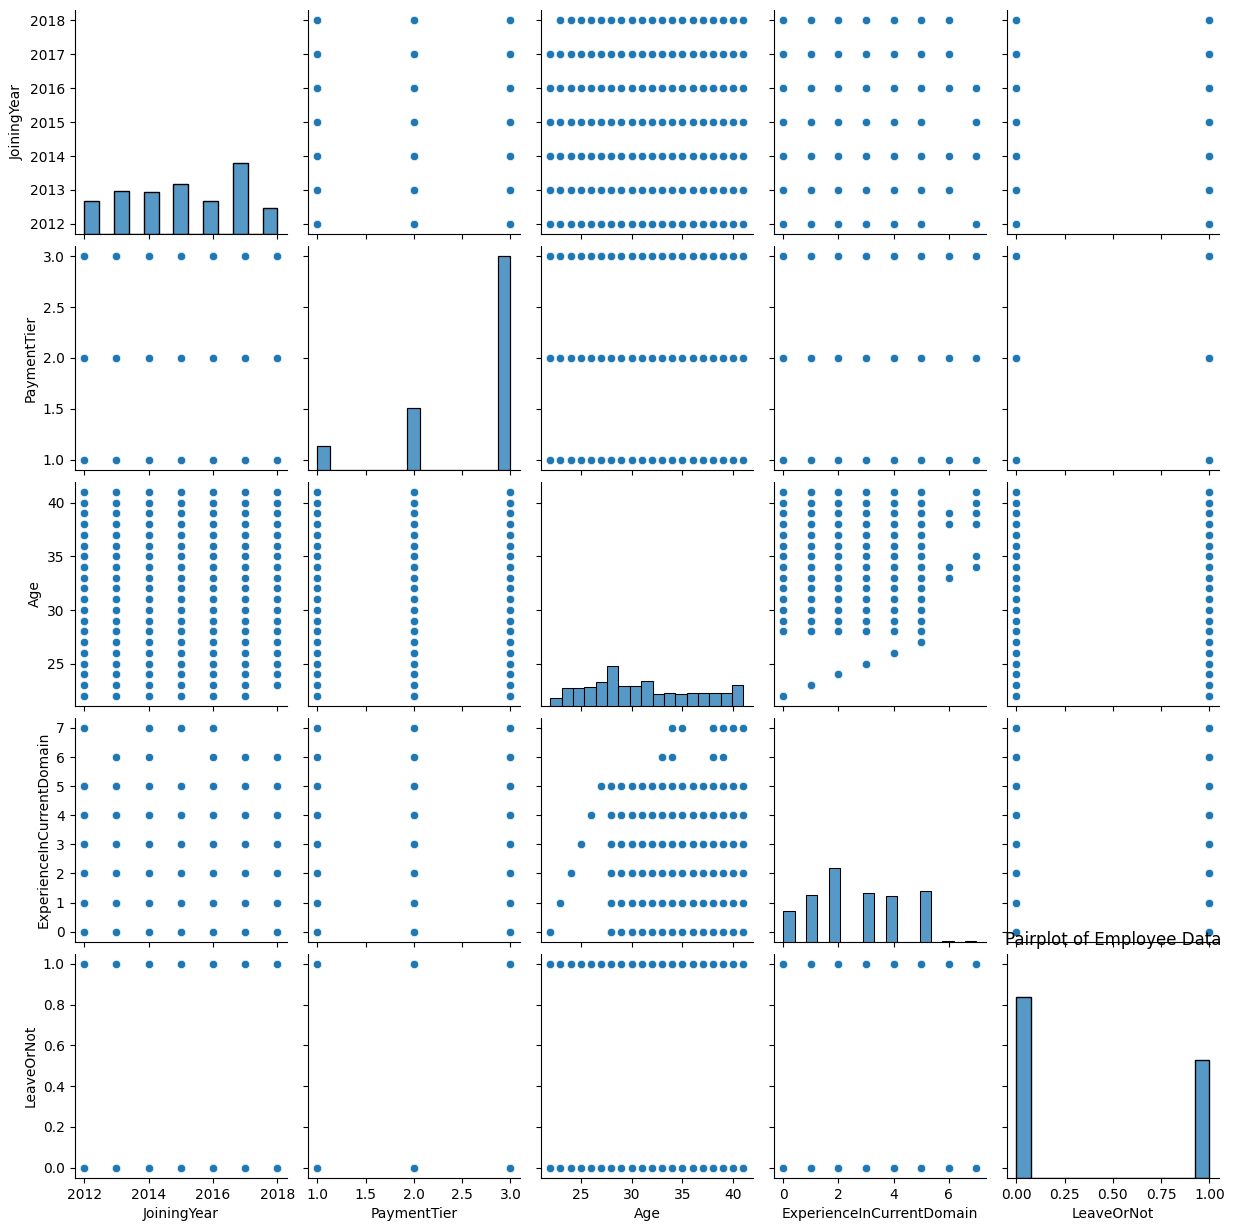

In [13]:
sns.pairplot(data=employee_data)
plt.title('Pairplot of Employee Data')
plt.show()

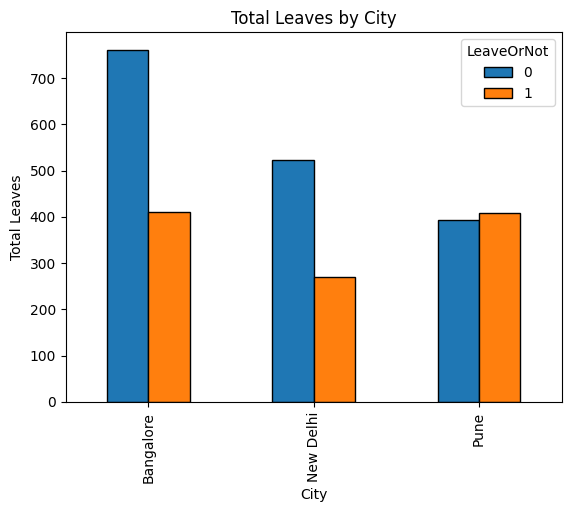

In [14]:
city_leaves = employee_data.groupby('City')['LeaveOrNot'].value_counts().unstack()
city_leaves.plot(kind="bar",edgecolor='black')
plt.xlabel('City')
plt.ylabel('Total Leaves')
plt.title('Total Leaves by City')
plt.show()

<Axes: xlabel='Gender', ylabel='PaymentTier'>

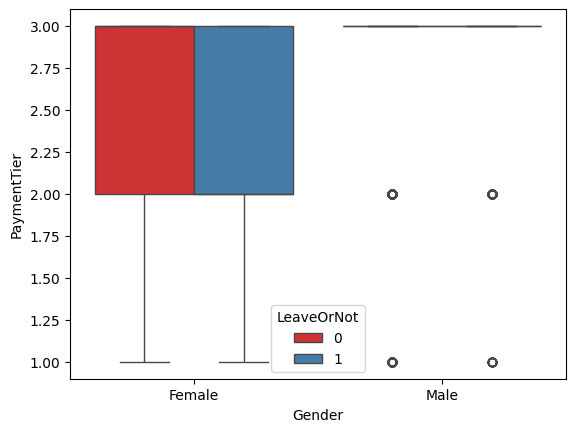

In [15]:
sns.boxplot(data=employee_data, x='Gender', y='PaymentTier', hue='LeaveOrNot', palette='Set1')

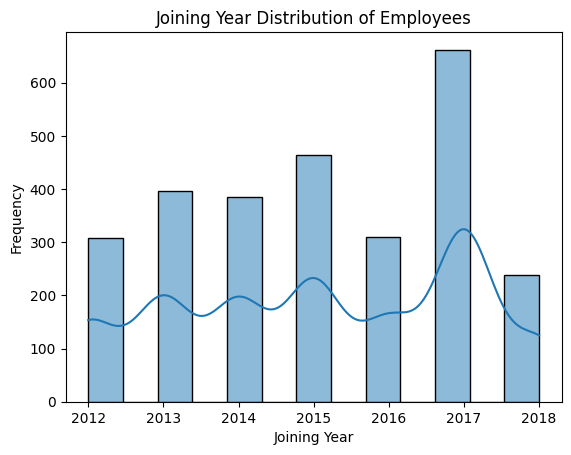

In [16]:
sns.histplot(employee_data["JoiningYear"], kde = True)
plt.title('Joining Year Distribution of Employees')
plt.xlabel('Joining Year')
plt.ylabel('Frequency')
plt.show()

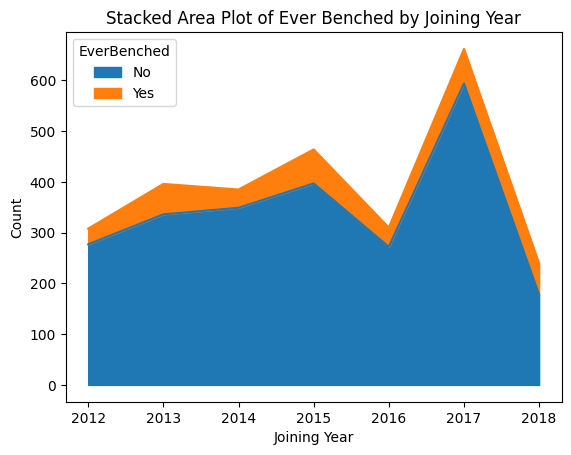

In [17]:
grouped = employee_data.groupby(["JoiningYear","EverBenched"])["EverBenched"].count().unstack()
grouped.plot(kind="area", stacked=True)
plt.title('Stacked Area Plot of Ever Benched by Joining Year')
plt.xlabel('Joining Year')
plt.ylabel('Count')
plt.show()

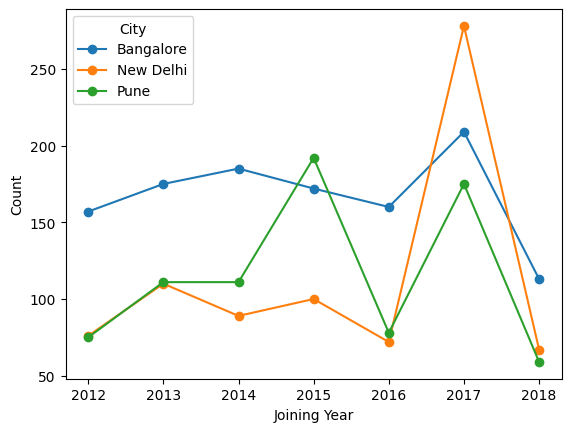

In [18]:
grouped = employee_data.groupby(["JoiningYear","City"])["Age"].count().unstack()
grouped.plot(kind="line", marker="o")
plt.xlabel('Joining Year')
plt.ylabel('Count')
plt.show()

In [19]:
employee_data.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
2529,Masters,2018,New Delhi,3,30,Female,No,4,1
2544,Bachelors,2018,Pune,3,30,Male,Yes,3,1
32,Bachelors,2018,Bangalore,3,26,Male,No,4,1
37,Bachelors,2018,New Delhi,2,34,Female,No,0,1
4598,Bachelors,2018,Bangalore,3,31,Male,No,0,1


In [20]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
X = employee_data.drop(columns=['JoiningYear', 'City', "Age","LeaveOrNot"])
y = employee_data.iloc[:, -1]
X["Education"] = label_encoder.fit_transform(X["Education"])
X["Gender"] = label_encoder.fit_transform(X["Gender"])
X["PaymentTier"] = label_encoder.fit_transform(X["PaymentTier"])
X["EverBenched"] = label_encoder.fit_transform(X["EverBenched"])
X

,Education,PaymentTier,Gender,EverBenched,ExperienceInCurrentDomain
2529,1,2,0,0,4
2544,0,2,1,1,3
32,0,2,1,0,4
37,0,1,0,0,0
4598,0,2,1,0,0
...,...,...,...,...,...
4095,0,2,0,0,2
4097,0,2,0,0,1
20,0,2,1,0,0
4627,2,2,0,0,4


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)
predictions = logistic_model.predict(X_test_scaled)
logistic_model.score(X_test_scaled, y_test)

0.6365280289330922

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [25]:
grid_search.best_params_

{'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}

In [27]:
grid_search.best_score_

np.float64(0.6625961103573044)

In [28]:
grid_search.cv_results_

{'mean_fit_time': array([0.13408232, 0.22892459, 0.44323572, 0.12469284, 0.225957  ,
        0.50802175, 0.0953424 , 0.22828499, 0.38560883, 0.11678354,
        0.22081987, 0.43754371, 0.10673134, 0.19723574, 0.39925194,
        0.10027496, 0.20390709, 0.41430076, 0.10551047, 0.22885434,
        0.44669175, 0.10692708, 0.23668949, 0.50898616, 0.13838514,
        0.25384609, 0.6127193 , 0.115647  , 0.26919476, 0.4442637 ,
        0.11049628, 0.22364783, 0.4232858 , 0.11681358, 0.19657397,
        0.33724467]),
 'std_fit_time': array([0.01920383, 0.04193253, 0.07988669, 0.01236392, 0.041923  ,
        0.04871046, 0.00520765, 0.04968686, 0.02602261, 0.01916089,
        0.0316198 , 0.01345092, 0.00604839, 0.00625892, 0.0106165 ,
        0.0004716 , 0.0072473 , 0.02744738, 0.00205287, 0.02013901,
        0.0247233 , 0.01367476, 0.01922209, 0.08138488, 0.00188334,
        0.04924975, 0.11770204, 0.00329874, 0.05606185, 0.02025231,
        0.0073306 , 0.01100263, 0.02141091, 0.01440679, 0.010

In [29]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_split=5, random_state=42)

In [30]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)
svm_model.score(X_test_scaled, y_test)

0.6853526220614828

In [33]:
param_grid = {
    "C":[0.1, 1, 10],
    "kernel":['linear', 'rbf', 'poly'],
}
gridsvm = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
gridsvm.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly']},
             verbose=2)

In [34]:
gridsvm.best_estimator_

SVC(C=1)

In [35]:
gridsvm.best_params_

{'C': 1, 'kernel': 'rbf'}

In [36]:
grid_svm_pred = gridsvm.predict(X_test_scaled)
gridsvm.score(X_test_scaled, y_test)

0.6853526220614828

In [38]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [39]:
dtree_pred = dtree.predict(X_test_scaled)
dtree.score(X_test_scaled, y_test)

0.6708860759493671

In [40]:
dtree.score(X_test_scaled, y_test)

0.6708860759493671

In [41]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_dtree = GridSearchCV(estimator=dtree, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_dtree.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10]},
             verbose=2)

In [44]:
grid_dtree.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2}

In [45]:
grid_dtree.best_score_

np.float64(0.6644052464947987)

In [46]:
grid_dtree_pred = grid_dtree.predict(X_test_scaled)
grid_dtree.score(X_test_scaled, y_test)

0.6726943942133815